In [38]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.applications.vgg16 import VGG16
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.layers import Flatten, Dense
from keras.models import Sequential
from keras.optimizers import Adam

In [39]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [40]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [41]:
# Resize the images 32*32 as required by VGG16
X_train = tf.image.resize(np.array(X_train)[..., tf.newaxis], (32, 32))
X_train = np.repeat(X_train, 3, axis=-1)
X_test = tf.image.resize(np.array(X_test)[..., tf.newaxis], (32, 32))
X_test = np.repeat(X_test, 3, axis=-1)

# Change pixel values from (0, 255) to (0, 1)
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0

In [42]:
X_train.shape, X_test.shape

((60000, 32, 32, 3), (10000, 32, 32, 3))

In [43]:
# Converting Labels to one hot encoded format
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [44]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False

58889256/58889256 [==============================] - 2s 0us/step


In [45]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [46]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
history = model.fit(
    X_train, y_train, epochs=8, verbose=1, batch_size=128, validation_split=0.2
)

Epoch 1/8
375/375 [==============================] - 796s 2s/step - loss: 0.6136 - accuracy: 0.7880 - val_loss: 0.4855 - val_accuracy: 0.8246
Epoch 2/8
375/375 [==============================] - 790s 2s/step - loss: 0.4342 - accuracy: 0.8427 - val_loss: 0.4301 - val_accuracy: 0.8447
Epoch 3/8
375/375 [==============================] - 788s 2s/step - loss: 0.4001 - accuracy: 0.8550 - val_loss: 0.4174 - val_accuracy: 0.8468
Epoch 4/8
375/375 [==============================] - 782s 2s/step - loss: 0.3742 - accuracy: 0.8631 - val_loss: 0.3996 - val_accuracy: 0.8525
Epoch 5/8
375/375 [==============================] - 721s 2s/step - loss: 0.3575 - accuracy: 0.8691 - val_loss: 0.4033 - val_accuracy: 0.8536
Epoch 6/8
375/375 [==============================] - 779s 2s/step - loss: 0.3434 - accuracy: 0.8739 - val_loss: 0.3902 - val_accuracy: 0.8605
Epoch 7/8
375/375 [==============================] - 720s 2s/step - loss: 0.3327 - accuracy: 0.8787 - val_loss: 0.3833 - val_accuracy: 0.8583
Epoch 

In [48]:
results = model.evaluate(X_test, y_test)
print(results)

313/313 [==============================] - 130s 412ms/step - loss: 0.3763 - accuracy: 0.8665
[0.3762805759906769, 0.8665000200271606]


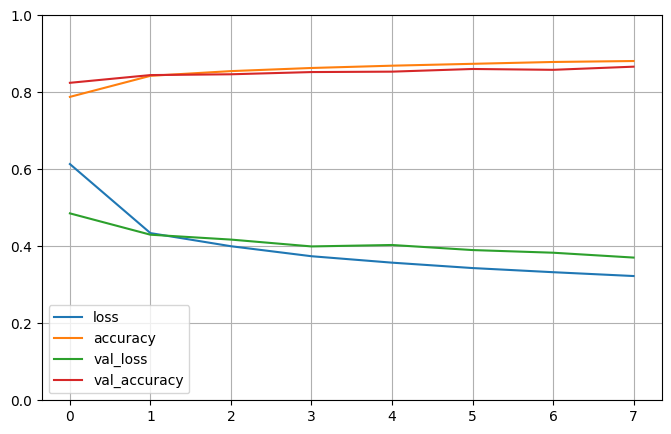

In [49]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [50]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [51]:
for i, layer in enumerate(model.layers):
    layer._name = 'layer_' + str(i)


conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


modified_model = Sequential([
   conv_base,
   Flatten(),
   Dense(256, activation="relu"),
   Dense(10, activation="softmax"),
])

In [52]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])


history = model.fit(
    X_train, y_train, epochs=2, verbose=1, batch_size=128, validation_split=0.2
)

Epoch 1/2
375/375 [==============================] - 802s 2s/step - loss: 0.2902 - accuracy: 0.8934 - val_loss: 0.3545 - val_accuracy: 0.8711
Epoch 2/2
375/375 [==============================] - 779s 2s/step - loss: 0.2861 - accuracy: 0.8955 - val_loss: 0.3521 - val_accuracy: 0.8725


In [53]:
results = model.evaluate(X_test, y_test)
print(results)

313/313 [==============================] - 134s 426ms/step - loss: 0.3606 - accuracy: 0.8695
[0.36058762669563293, 0.8694999814033508]


In [54]:
# Вывод:
# сравнивая обычную оберточную сеть и оберточную сеть, которая использует VGG16 в качестве оберточной основы, можно заметить, что
# обычная сеть показала большую точность при одинаковом размере батча и одинаковом количестве учебных эпох.